In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('./train.csv')

In [18]:
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [20]:
df = df.select_dtypes(include=['number'])
correlation_matrix = df.corr()

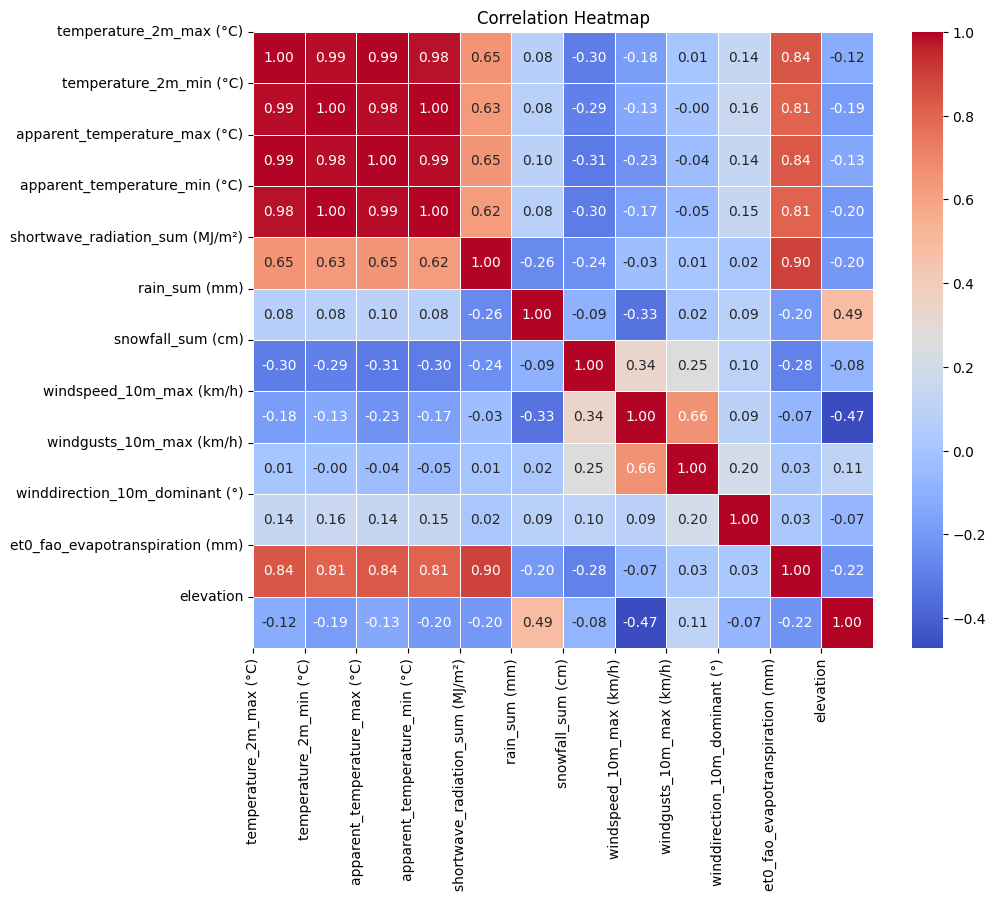

In [24]:
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add labels and title
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [25]:
df = df[['et0_fao_evapotranspiration (mm)','shortwave_radiation_sum (MJ/m²)']]
df.head()

,et0_fao_evapotranspiration (mm),shortwave_radiation_sum (MJ/m²)
0,3.61,17.59
1,4.11,19.87
2,4.23,20.44
3,4.22,20.44
4,4.16,20.10


In [26]:
quantiles_data1 = stats.rankdata(df['et0_fao_evapotranspiration (mm)']) / len(df['et0_fao_evapotranspiration (mm)'])
quantiles_data2 = stats.rankdata(df['shortwave_radiation_sum (MJ/m²)']) / len(df['shortwave_radiation_sum (MJ/m²)'])

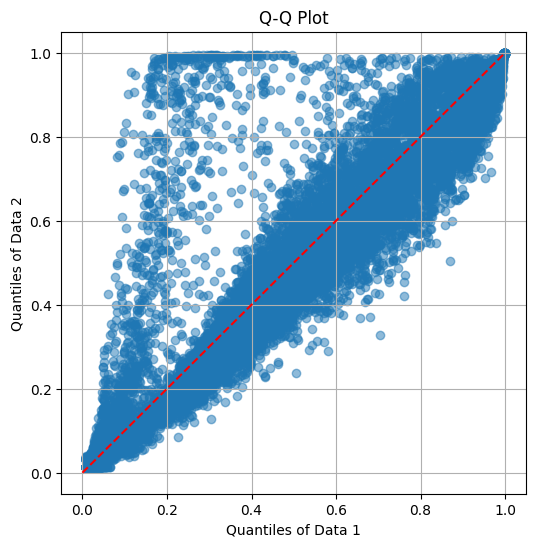

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(quantiles_data1, quantiles_data2, alpha=0.5)
plt.xlabel('Quantiles of Data 1')
plt.ylabel('Quantiles of Data 2')
plt.title('Q-Q Plot')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Add a reference line for perfect agreement
plt.grid(True)
plt.show()

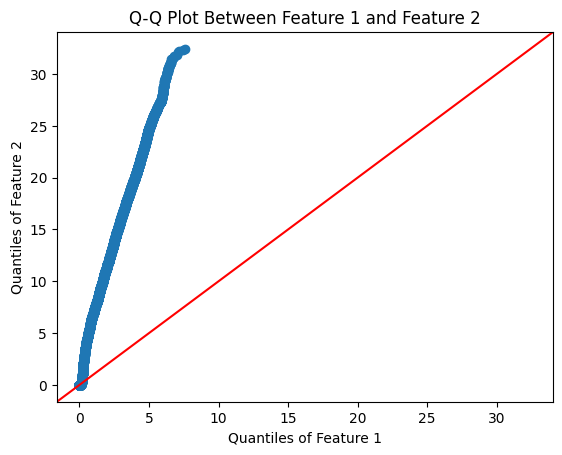

In [28]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
sm.qqplot_2samples(df['et0_fao_evapotranspiration (mm)'], df['shortwave_radiation_sum (MJ/m²)'], line='45')
plt.xlabel('Quantiles of Feature 1')
plt.ylabel('Quantiles of Feature 2')
plt.title('Q-Q Plot Between Feature 1 and Feature 2')
plt.show()